### Importing python libraries and the cleaned dataset .csv file.

In [31]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
%matplotlib inline

In [32]:
df = pd.read_csv("kc_housing_data_cleaned_with_15_19_prices.csv")
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,date_key,Compounding,Discounting,price_dec_15,price_dec_19
0,5056500260,5/2/2014,440000.0,4,2.25,2160,8119,1.0,0.0,0.0,...,98006,47.5443,-122.177,1850,9000,2014-05-02,1.109072,0.901654,487991.86,598799.49


### Linear regression of the variable that correlates most highly with price.

In [33]:
x1 = df['sqft_living']
y1 = df['price']
X = sm.add_constant(x1)
model_sm = sm.OLS(y1,X)
results = model_sm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.073e+04
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        09:22:46   Log-Likelihood:            -2.9763e+05
No. Observations:               21420   AIC:                         5.953e+05
Df Residuals:                   21418   BIC:                         5.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.255e+04   4436.470     -9.591      0.000   -5.12e+04   -3.39e+04
sqft_living   280.5436      1.949    143.972      0.000     276.724     284.363
==============================================================================
Omnibus:                    14710.422   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           541541.173
Skew:                           2.827   Prob(JB):                         0.00
Kurtosis:                      26.975   Cond. No.                     5.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multi-variate regression. The variables selected had a low correlation with eachother to minimise any negative effects of colinearity.

In [34]:
# Remember to add distance to town in this analysis

X1 = df[['sqft_living','sqft_lot','view']]
y1 = df['price']
X = sm.add_constant(X1)
first_multi = sm.OLS(y1,X)
results = first_multi.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     8211.
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        09:22:47   Log-Likelihood:            -2.9668e+05
No. Observations:               21420   AIC:                         5.934e+05
Df Residuals:                   21416   BIC:                         5.934e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.693e+04   4285.292     -3.951      0.000   -2.53e+04   -8530.314
sqft_living   259.2335      1.967    131.783      0.000     255.378     263.089
sqft_lot       -0.3466      0.042     -8.274      0.000      -0.429      -0.264
view         1.026e+05   2332.478     44.005      0.000    9.81e+04    1.07e+05
==============================================================================
Omnibus:                    14189.563   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           564063.365
Skew:                           2.648   Prob(JB):                         0.00
Kurtosis:                      27.575   Cond. No.                     1.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### It can be seen that the inclusion of these varibales increased the R-squared value from when only a signle variable was considered. This means that the model better fits the dataset.

### Outlier treatment (decided not to remove any as it actually worsened the R-squared value)

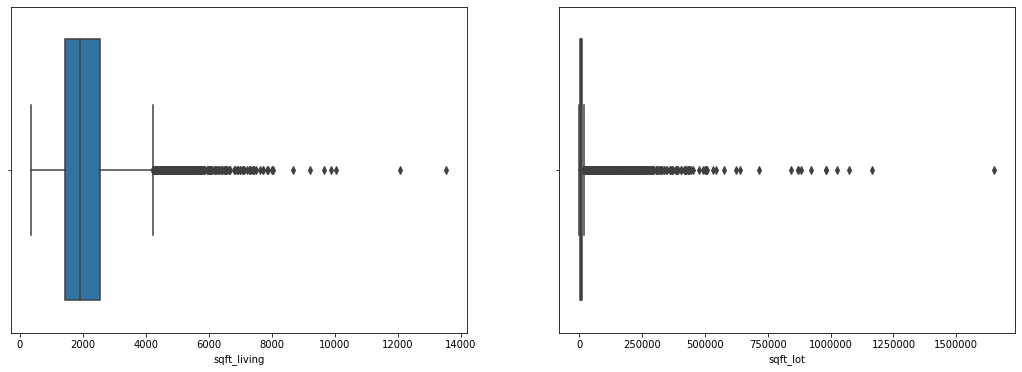

In [35]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
display(sns.boxplot(x = df['sqft_living']))

plt.subplot(1, 2, 2)
display(sns.boxplot(x = df['sqft_lot']))

#### These boxplots show where the outliers sit in the data.

In [36]:
# calculate summary statistics
variable = 'sqft_living'
data_mean, data_std = mean(df[variable]), std(df[variable])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(upper)
# identify outliers
outliers = [x for x in df[variable] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df[variable] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

4839.493524661104
Identified outliers: 247
Non-outlier observations: 21173


In [37]:
# df_original = df.copy()

# variable = 'sqft_living'
# data_mean, data_std = mean(df[variable]), std(df[variable])
# cut_off = data_std * 3

# for i in range(len(df)):
#     if df.loc[i,variable] < (data_mean - cut_off) or df.loc[i,variable] > (data_mean + cut_off):
#         df.drop([i], inplace=True)
#     else:
#         continue

# print(len(df))

In [38]:
# x1 = df['sqft_living']
# y1 = df['price']
# X = sm.add_constant(x1)
# model_sm = sm.OLS(y1,X)
# results = model_sm.fit()
# results.summary()

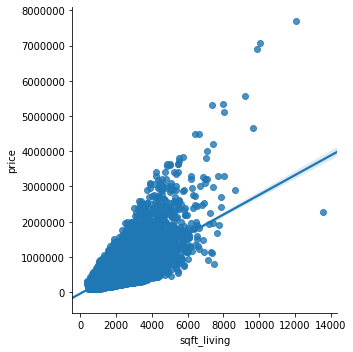

In [39]:
sns.lmplot(data=df, x='sqft_living',y='price')

#### Removing the outliers resulted in a reduction in the R-squared value. The is due to the relationship of price and sqft_living not being perfectly linear. The rate of price increase with sqft_living increases as the property gets bigger.

# Isolating the desired zipcode...

In [40]:
unique_zips = df['zipcode'].unique()
unique_zips

array([98006, 98008, 98052, 98115, 98038, 98045, 98119, 98105, 98074,
       98106, 98042, 98007, 98155, 98001, 98133, 98075, 98059, 98065,
       98027, 98199, 98092, 98011, 98014, 98103, 98107, 98077, 98116,
       98055, 98024, 98166, 98023, 98198, 98102, 98072, 98125, 98003,
       98034, 98117, 98029, 98033, 98136, 98053, 98122, 98058, 98118,
       98168, 98144, 98019, 98056, 98112, 98146, 98005, 98177, 98004,
       98040, 98108, 98028, 98148, 98109, 98126, 98010, 98032, 98178,
       98030, 98031, 98070, 98022, 98188, 98039, 98002])

In [41]:
len(unique_zips)

70

### Plotting the postcode vs the average sale price. This analysis aims to see how the importance of variables change with the price of the property.

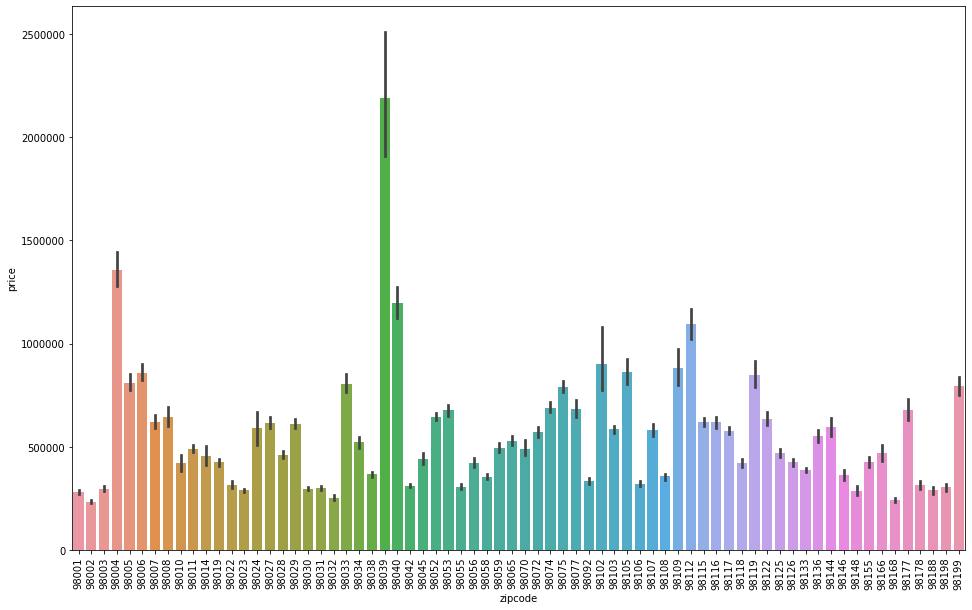

In [13]:
plt.figure(figsize=(16, 10))
sns.barplot(x='zipcode',y='price',data=df)
plt.xticks(rotation=90)
plt.show()

In [14]:
# zipcode = 98001
# df_zipcode = df.loc[df['zipcode'] == zipcode]

def zipcode_r_squared(df_zipcode, variable1, variable2, variable3):

    X1 = df_zipcode[[variable1,variable2,variable3]]
    y1 = df_zipcode['price']
    X = sm.add_constant(X1)
    first_multi = sm.OLS(y1,X)
    results = first_multi.fit()
    r2 = results.rsquared
    return r2

In [15]:
# df.loc[df['zipcode'] == 98001]

In [42]:
variable1 = 'sqft_living'
variable2 = 'sqft_lot'
variable3 = 'view'

zipcode_r_squared_values = []
unique_zips = df['zipcode'].unique()

for zipcode in unique_zips:
    
    df_zipcode = df.loc[df['zipcode'] == zipcode]
    r2 = zipcode_r_squared(df_zipcode, variable1, variable2, variable3)
    zipcode_r_squared_values.append(r2)

# zipcode_r_squared_values

/Users/ravimalde/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
X1 = df[['sqft_living','sqft_lot','view']]
y1 = df['price']
X = sm.add_constant(X1)
first_multi = sm.OLS(y1,X)
results = first_multi.fit()
r2 = results.rsquared

entire_df_r_squared = [r2] * len(unique_zips)

In [44]:
zipcode_r_squared_values_array = np.asarray(zipcode_r_squared_values)
entire_df_r_squared_array = np.asarray(entire_df_r_squared)

r_squared_difference = zipcode_r_squared_values_array - entire_df_r_squared_array
# r_squared_difference

In [45]:
zipcode_r_squared_dict = {'zipcode_r_squared' : zipcode_r_squared_values,
                            'original_r_squared' : entire_df_r_squared,
                                'r_squared_difference' : r_squared_difference}

In [46]:
difference_in_r_squared = pd.DataFrame(zipcode_r_squared_dict)
difference_in_r_squared

,zipcode_r_squared,original_r_squared,r_squared_difference
0,0.659398,0.534937,0.124461
1,0.698220,0.534937,0.163284
2,0.717879,0.534937,0.182942
3,0.653148,0.534937,0.118212
4,0.735457,0.534937,0.200520
...,...,...,...
65,0.517463,0.534937,-0.017473
66,0.732765,0.534937,0.197829
67,0.703037,0.534937,0.168100
68,0.907615,0.534937,0.372678


In [23]:
difference_in_r_squared['r_squared_difference'].mean()

0.16110129250351246